<a href="https://colab.research.google.com/github/snpushpi/Covid19_Contact_tracing_repo_beta/blob/master/Final_data_analysis_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TPR and FPR in the same graph. One graph for each epsilon and how tpr and fpr varies over run number.

In [139]:
run_number = []
for i in range(100):
    run_number.append(i)


In [140]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
plt.style.use('ggplot')
%matplotlib inline

In [141]:
def TPR(tp, fn):
    frac = tp/(tp+fn)
    return 100*frac

In [142]:
def FPR(fp, tn):
    frac = fp/(fp+tn)
    return 100*frac

In [143]:
def fpr_tpr_list_generator(tp_list, fp_list):
    tpr_list = []
    fpr_list = []
    for tp in tp_list:
        fn = 14-tp 
        tpr_list.append(TPR(tp,fn))
    for fp in fp_list:
        tn = 720-14-fp
        fpr_list.append(FPR(fp,tn))
    return tpr_list, fpr_list

In [144]:
def driver_code(tuple_list):
    l = len(tuple_list)
    last = tuple_list[-1]
    tp_list = []
    fp_list = []
    for i in range(l):
        tp_list.append(tuple_list[i][0])
        fp_list.append(tuple_list[i][1])
    for i in range(100-l):
        tp_list.append(last[0])
        fp_list.append(last[1])
    return fpr_tpr_list_generator(tp_list,fp_list)

In [204]:
def draw(tpr_list_dict,fpr_list_dict, color_dict):
    fig = plt.figure()
    plt.clf()
    plt.xlabel('Run Number')
    plt.ylabel('Cumulative TPR and FPR')
    for elt in tpr_list_dict:
        plt.plot(run_number,tpr_list_dict[elt],'{}-'.format(color_dict[elt]),label = 'TPR, Epsilon={}'.format(elt))
        plt.plot(run_number, fpr_list_dict[elt],'{}--'.format(color_dict[elt]),label = 'FPR, Epsilon={}'.format(elt))
    plt.style.use(['grayscale'])
    plt.rcParams['axes.facecolor'] = 'white'
    mpl.rcParams['lines.linewidth'] = 2
    mpl.rcParams['boxplot.showbox'] = True
    mpl.rcParams['axes.titlesize']=24
    mpl.rcParams['axes.labelsize']=10
    mpl.rcParams['lines.linewidth']=2
    mpl.rcParams['xtick.labelsize']=10
    mpl.rcParams['ytick.labelsize']=10
    plt.legend(loc='lower right') 
    



In [197]:
tuple_list_dictionary1 = {2.5:[(4, 14),(5, 18),(5, 20),(6, 21),(6, 24),(7, 25),(7, 25),(8, 25),(8, 26),(8, 26),(8, 26),(9, 26)],3:[(5, 17),(8, 18),(11, 19),(11, 20),(11, 21),(11, 22),(11, 22),(11, 22),(11, 22),(11, 22),(11, 22),(11, 23)],
                         3.5:[(6, 15),(6, 16),(7, 16),(7, 17),(7, 18),(7, 19),(7, 19),(7, 19),(7, 20)]}
color_dict = {2.5:'b',3:'r',3.5:'c'}
tpr_list_dictionary = {}
fpr_list_dictionary = {}
for elt in tuple_list_dictionary1:
    tpr_list_dictionary[elt], fpr_list_dictionary[elt]= driver_code(tuple_list_dictionary1[elt])

In [198]:
len(tpr_list_dictionary)

3

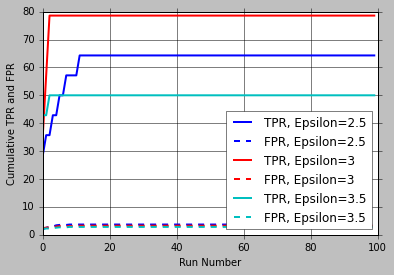

In [205]:
draw(tpr_list_dictionary, fpr_list_dictionary, color_dict)

In [206]:
tuple_list_dict2 = {4:[(6, 10),(6, 11),(6, 11),(6, 13),(6, 15),(9, 15)],
                         4.5:[(3, 12),(8, 14),(8, 16),(8, 17)],5.5:[(2, 9),(2, 9),(3, 9),(3, 9),(4, 9)],
                         6:[(3, 8),(3, 9),(3, 10),(3, 10),(3, 10),(3, 10),(3, 12),(3, 12),(3, 13)]}
color_dict = {4:'b',4.5:'r',5.5:'c',6:'k'}
tpr_list_dictionary = {}
fpr_list_dictionary = {}
for elt in tuple_list_dict2:
    tpr_list_dictionary[elt], fpr_list_dictionary[elt]= driver_code(tuple_list_dict2[elt])

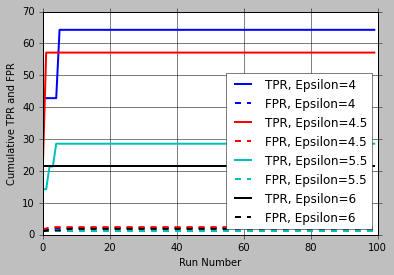

In [207]:
draw(tpr_list_dictionary, fpr_list_dictionary, color_dict)